# Sprint-4：ロジスティック回帰のスクラッチ
___

## import部

In [68]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

import missingno as msno

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris

## 定数

In [2]:
LAMDA = 1

## クラス：ScratchLogisticRegression

In [51]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=10, lr=0.01, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        self.theta = np.array(0)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # Set theta with random value
        onesX_train = np.array([np.concatenate(([1], v)) for v in X])
        
        if len(X_val) != 0 and len(y_val) != 0:
            onesX_test = np.array([np.concatenate(([1], v)) for v in X_val])
        
        self.theta = np.random.rand(len(onesX_train[0]))
        
        count = 0
        while count < self.iter:
            
            # Update theata value
            self._gradient_descent(onesX_train, y)

            # Pre-step to calculate loss
            y_eq_0 = np.inner(-y, np.log(self._sig_linear_hypothesis(onesX_train)))
            y_eq_1 = np.inner((1 - y), np.log(1 - self._sig_linear_hypothesis(onesX_train)))
            reg_term = (LAMDA / (2*len(onesX_train))) * np.sum(self.theta**2)

            # Calculate loss
            self.loss[count] = (1/len(onesX_train) * (np.sum(y_eq_0 - y_eq_1))) + reg_term

            
            # For test data
            if X_val is not None and y_val is not None:
                y_eq_0 = np.dot(-y_val, np.log(self._sig_linear_hypothesis(onesX_test)))
                y_eq_1 = np.dot((1 - y_val), np.log(1 - self._sig_linear_hypothesis(onesX_test)))
                reg_term = (LAMDA / (2*len(onesX_test))) * np.sum(self.theta**2)

                self.val_loss[count] = 1/len(onesX_test) * (np.sum(y_eq_0 - y_eq_1)) + reg_term

            count += 1

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
#                 print("{}回目の損失：{}".format(count, self.loss[count-1]))
                print("y_eq_0:{}".format(y_eq_0))
                print("y_eq_1:{}".format(y_eq_1))
                print("reg_term:{}".format(reg_term))

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        onesX = np.array([np.concatenate(([1], v)) for v in X])
        
        return self._sig_linear_hypothesis(onesX)
    
    def _sig_linear_hypothesis(self, X):
        """
        ロジスティック回帰の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """

        # Calculate hypothesis with sigmoid
        h_theta_x = 1 / (1 + np.exp(-np.dot(X, self.theta)))

        return h_theta_x
                        
    def _gradient_descent(self, X, y):
        """
        説明を記述
        """
        
        error = self._sig_linear_hypothesis(X) - y
#         print("error:{}".format(error))
        # Calculate likelihood
        likelihood = np.dot(error, X)
#         print("self._sig_linear_hypothesis(X):{}".format(self._sig_linear_hypothesis(X)))
#         print("likelihood:{}".format(likelihood))
    
        # Calculate regularization term
        reg_term = LAMDA/len(X) * np.concatenate([[0], self.theta[1:]]) 
        
        # Update theta with regularization term
        self.theta = self.theta - self.lr*(1/len(X) * likelihood + reg_term)
#         print("theta:{}".format(self.theta))
#         print("reg_term:{}".format(reg_term))
        
    def plot_loss(self):
        """
        説明を記述
        """
        x1 = np.arange(len(self.loss))
        x2 = np.arange(len(self.val_loss))

        fig = plt.figure(figsize=(12,8))
        plt.plot(x1, self.loss)
        plt.plot(x2, self.val_loss)
        plt.show()

## データセットの読み込み

In [4]:
iris_dataset = load_iris()

## データセットから対象範囲を抽出

In [5]:
iris_data_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
target_iris_df = pd.DataFrame(iris_dataset.target)

iris_df = pd.concat([iris_data_df, target_iris_df], axis=1)
iris_df = iris_df.rename(columns={0:"species"})

# Extract 'virgicolor'(species=1) and 'virginica'(species=2)
data_virs = iris_df[iris_df['species'].isin(['1','2'])]
# data_virs_sh = data_virs.sample(frac=1)

## 学習用にデータを整形

In [7]:
train_X = data_virs.drop(["species"], axis=1)
train_Y = data_virs["species"]
train_Y_01 = train_Y - 1

## 学習用とテスト用にデータを分割

In [48]:
x_train, x_test, y_train, y_test = train_test_split(np.array(train_X), \
                                                    np.array(train_Y_01), \
                                                    train_size=0.70, test_size=0.30)

## データの標準化

In [49]:
sc = StandardScaler()
std_train_X = sc.fit_transform(x_train)
std_test_X = sc.fit_transform(x_test)

## スクラッチしたロジスティック回帰の学習を実行

In [62]:
slr = ScratchLogisticRegression(num_iter=1000)
slr.fit(x_train, y_train, x_test, y_test)

In [64]:
pred_proba = slr.predict_proba(x_test)

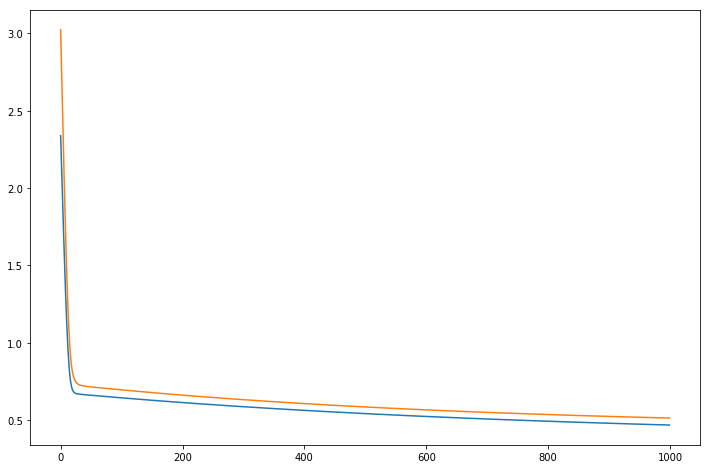

In [63]:
slr.plot_loss()

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba, pos_label=1)
auc(fpr, tpr)

0.9907407407407407

In [66]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
pred_sci = lr_model.predict_proba(x_test)

/Users/toshihiko/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
fpr, tpr, thresholds = roc_curve(y_test, pred_sci[:, :1].reshape(30,), pos_label=1)
auc(fpr, tpr)

0.0

In [104]:
train_X_2nd = data_virs.iloc[:, 1:3]
train_Y_2nd = data_virs["species"]
train_Y_01_2nd = train_Y_2nd - 1

In [108]:
x_train_2nd, x_test_2nd, y_train_2nd, y_test_2nd = train_test_split(np.array(train_X_2nd), \
                                                    np.array(train_Y_01_2nd), \
                                                    train_size=0.70, test_size=0.30)

In [109]:
slr_2nd = ScratchLogisticRegression(num_iter=1000)
slr_2nd.fit(x_train_2nd, y_train_2nd, x_test_2nd, y_test_2nd)

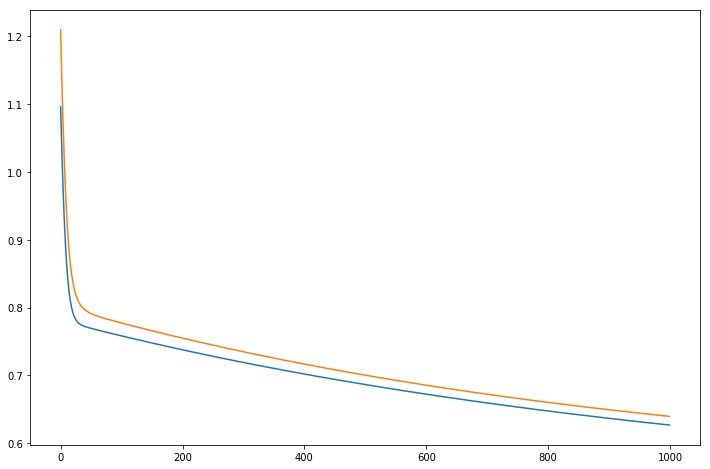

In [110]:
slr_2nd.plot_loss()

In [111]:
y_pred_2nd = slr_2nd.predict_proba(x_test_2nd)